In [1]:
# Загрузка данныхx
import src.data as d
import src.drawer as drawer
import numpy as np
import math
import importlib

source_data, markers = d.load_data("data/ocr.dat", 2, False)
# source_data, markers = d.load_noise(100, 5)

# Сортировка по дисперсии
source_std_dev = np.std(source_data,1)
d.sort(source_data, source_std_dev)

# Получаем ков. матрицу и собственные значения с векторами, сортируем
source_cov_mat = np.cov(source_data)
source_e_vals, source_e_vecs = np.linalg.eig(source_cov_mat)

file dim: 25
file len: 840
real len: 420


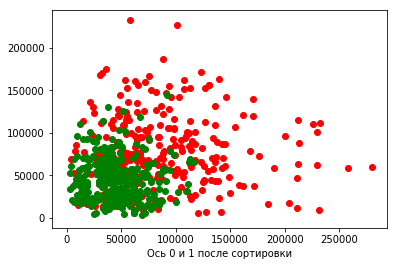

In [2]:
drawer.plot_2d(source_data, markers, 0, 1, "Ось 0 и 1 после сортировки").show()

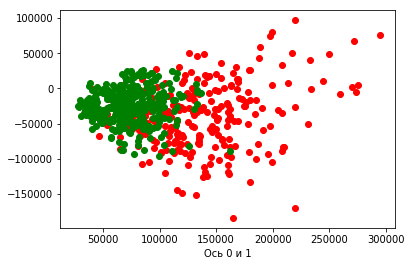


Квадрат относительной ошибки
1 : 1.2957
2 : 0.8231
3 : 0.6040
4 : 0.4054
5 : 0.3062
6 : 0.2124
7 : 0.1508
8 : 0.0000


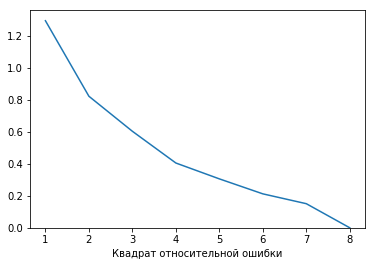

In [3]:
#PCA 
import src.pca as pca
importlib.reload(pca)

# Проекция
pca_data, pca_error = pca.calculate(source_data)
drawer.plot_2d(pca_data, markers, 0, 1, "Ось 0 и 1").show()

# Квадрат относительной ошибки
print("\nКвадрат относительной ошибки")
for i in range(len(pca_error)):
    print(i+1, ": %.4f" % pca_error[i])

drawer.plot_line(pca_error, label='Квадрат относительной ошибки').show()

1..2..3..4..5..6..7..8..


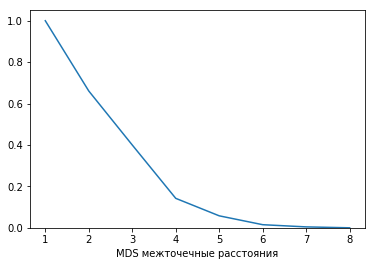

Размерность: 5


In [4]:
#MDS
import src.mds as mds
importlib.reload(mds)

mds_data_list = [] 
mds_distances = np.empty(len(source_data))
mds_prepared = mds.init(source_data)


for i in range(1, len(mds_distances)+1):
    print(i,end='..')
    proj, distance = mds_prepared.calculate(i)
    mds_data_list.append(proj)
    mds_distances[i-1] = distance
print()

mds_distances /= max(mds_distances)
drawer.plot_line(mds_distances, label='MDS межточечные расстояния').show()
print("Размерность:", mds.real_dimensionality(mds_distances, 0.1))

In [30]:
# Хопкинс
import src.hopkins as hopkins
importlib.reload(hopkins)

source_hopkins = []
mds_hopkins = []
pca_hopkins = []

for i in range(1, len(source_data)+1):
    source_hopkins.append(hopkins.calculate(source_data[:i]))
    mds_hopkins.append(hopkins.calculate(mds_data_list[i-1]))
    pca_hopkins.append(hopkins.calculate(pca_data[:i]))

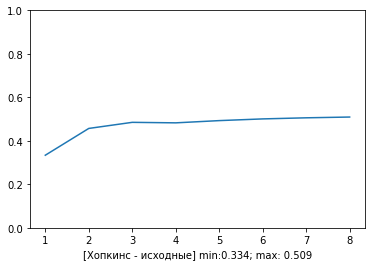

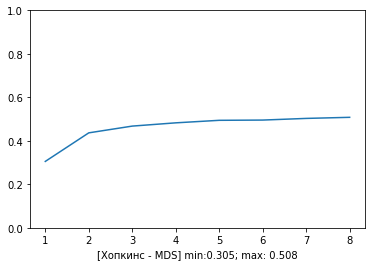

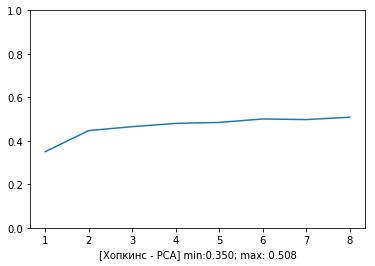

In [31]:
src_hopkins_label = '[Хопкинс - исходные] min:' + '%.3f' % min(source_hopkins) +'; max: ' + '%.3f' % max(source_hopkins)
drawer.plot_line(source_hopkins, label=src_hopkins_label, top=1).show()

mds_hopkins_label = '[Хопкинс - MDS] min:' + '%.3f' % min(mds_hopkins) +'; max: ' + '%.3f' % max(mds_hopkins)
drawer.plot_line(mds_hopkins, label=mds_hopkins_label, top=1).show()

pca_hopkins_label = '[Хопкинс - PCA] min:' + '%.3f' % min(pca_hopkins) +'; max: ' + '%.3f' % max(pca_hopkins)
drawer.plot_line(pca_hopkins, label=pca_hopkins_label, top=1).show()

In [32]:
# Хуберт
import src.hubert as hubert
importlib.reload(hubert)

source_hubert = []
mds_hubert = []
pca_hubert = []

for i in range(1, len(source_data)+1):
    source_hubert.append(hubert.calculate(source_data[:i], markers))
    mds_hubert.append(hubert.calculate(mds_data_list[i-1], markers))
    pca_hubert.append(hubert.calculate(pca_data[:i], markers))

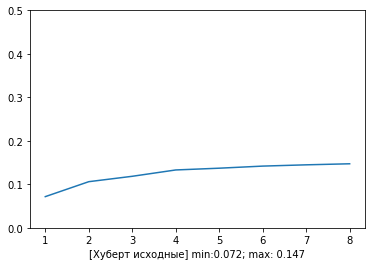

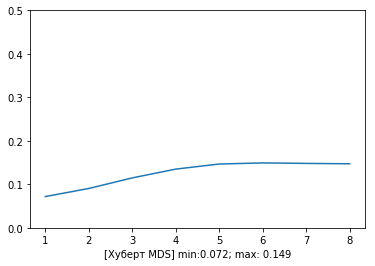

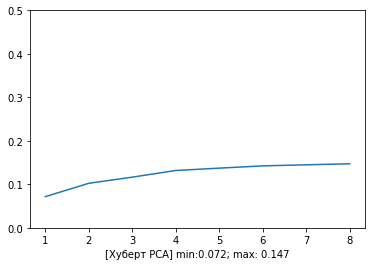

In [33]:
hubert_top = 0.5
src_hubert_label = '[Хуберт исходные] min:' + '%.3f' % min(source_hubert) +'; max: ' + '%.3f' % max(source_hubert)
drawer.plot_line(source_hubert, label=src_hubert_label, top=hubert_top).show()

mds_hubert_label = '[Хуберт MDS] min:' + '%.3f' % min(mds_hubert) +'; max: ' + '%.3f' % max(mds_hubert)
drawer.plot_line(mds_hubert, label=mds_hubert_label, top=hubert_top).show()

pca_hubert_label = '[Хуберт PCA] min:' + '%.3f' % min(pca_hubert) +'; max: ' + '%.3f' % max(pca_hubert)
drawer.plot_line(pca_hubert, label=pca_hubert_label, top=hubert_top).show()

In [52]:
time.time()

1585733613.631932